<a href="https://colab.research.google.com/github/MayBornWitIt/Machine_Learning/blob/main/Project_2_Part_3_%5BCore%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

In [2]:
#Load the Data
df = pd.read_csv('/content/adult.csv.zip')

In [3]:
# Display the first (5) rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [5]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [7]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") ## or 'object'

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="object") # or 'number'

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [9]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# Confirm now duplicate rows remain
df.duplicated().sum()

0

<Axes: ylabel='income'>

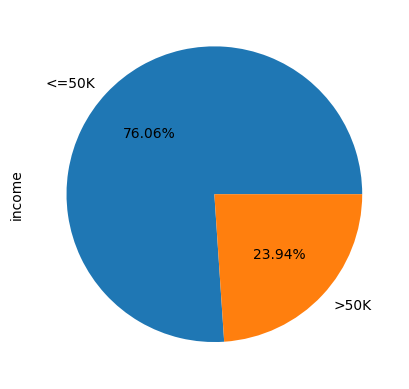

In [12]:
df['income'].value_counts().plot(kind="pie",autopct="%1.2f%%")

Based on the pie graph above, it displays the majority of adults in the dataset as making less than $50k.

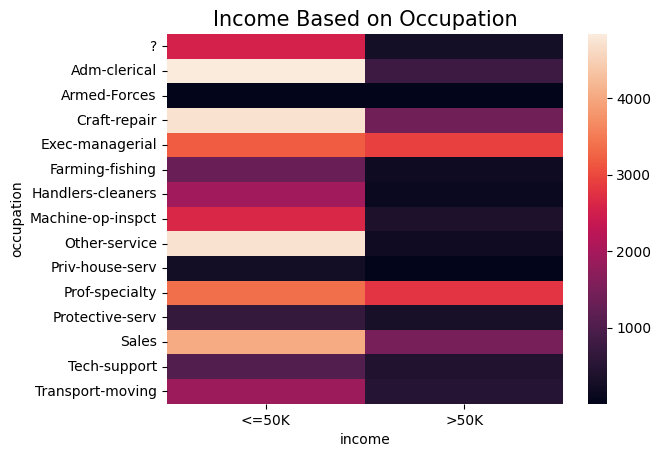

In [13]:
sns.heatmap(pd.crosstab(df['occupation'],df['income']))
plt.title('Income Based on Occupation', fontsize = 15)
plt.show()

Based on the heatmap above, their is a high rate of adults who have an executive management occupation making over $50k.

Compared to the majority of adults in the dataset are in the admin-clerical occupation making less than $50K.

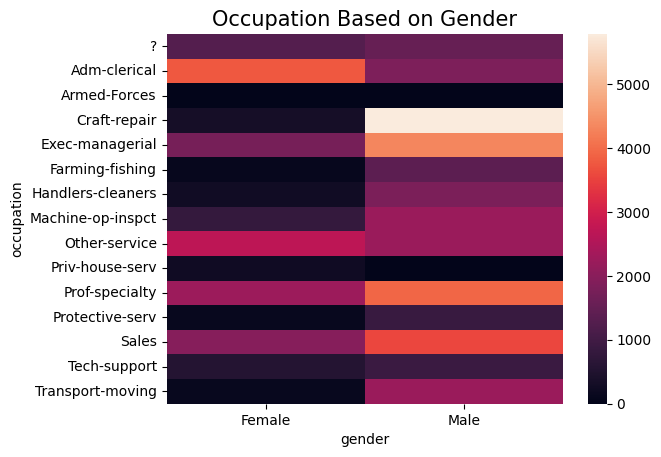

In [14]:
sns.heatmap(pd.crosstab(df['occupation'],df['gender']))
plt.title('Occupation Based on Gender', fontsize = 15)
plt.show()

Based on the heatmap above, this dataset displays a high rate of females having admin-clerical occupations, following other service, professional specialty, sales and executive management. Majority of males are in Craft repair occupations, executive management, professional specialty and sales. 

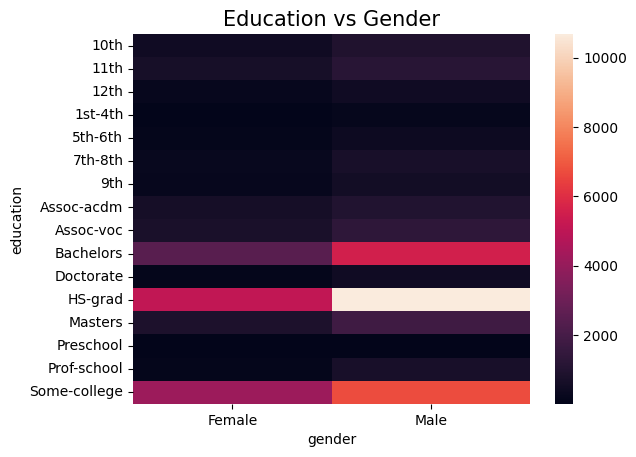

In [15]:
sns.heatmap(pd.crosstab(df['education'],df['gender']))
plt.title('Education vs Gender', fontsize = 15)
plt.show()

Based on the heatmap above, this dataset displays a high rate of male adults have obtained a high school graduate education and bachelors along with some college education. Although, low rates on Associates and Master's education. Majority of adult females have obtained mainly a high school graduate education and some college with a low rate for Bachelors and Masters education. 

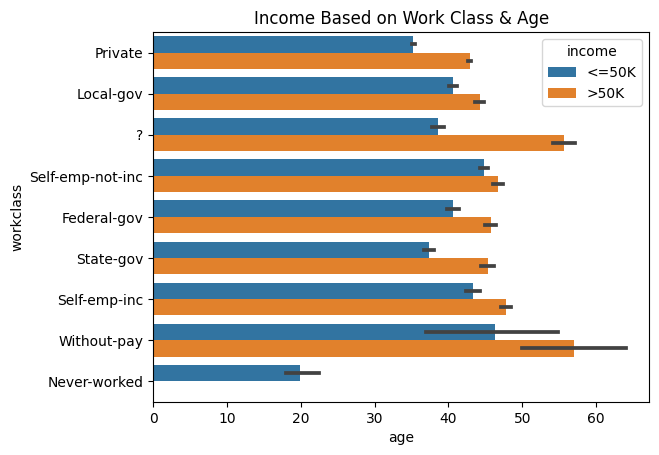

In [16]:
sns.barplot(x=df['age'],y=df['workclass'], hue=df['income'])
plt.title('Income Based on Work Class & Age', fontsize = 12)
plt.show()

Based on the barplot above, ages 40's and older make more than $50k. There is an unclassified class that must be addressed. Defined outliers in "Without-pay" class that must be looked into as well. 

Text(0.5, 1.0, 'Income Based on Hours & Age')

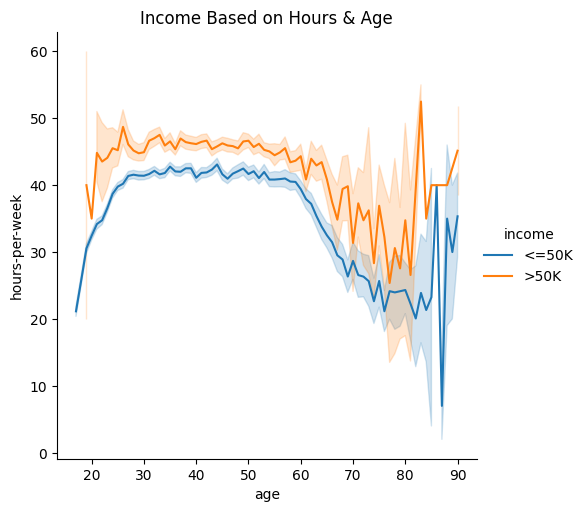

In [17]:
sns.relplot(df, kind="line",
    x="age", y="hours-per-week", hue="income")

plt.title('Income Based on Hours & Age', fontsize = 12)

Based on the graph above, the older in age the less hours per week. The oldest being around 80-90 years of age seems to peak (I would think adults keeping tabs on investments at that point).  

There are many analysis one can make with this dataset, based on the visuals above I choose the last two exploratory visuals for key trends. There are notable correlations to income such as attributes of hours per week, age, gender, class and occupation to say the least. 